# Programming for Data Analytics Final Project: Wind

### Author: Aoife Flavin

Put a description of what the project is for here



Description of the dataset

In [21]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


I began by loading in the dataset and taking a look at the first few rows of data.

In [36]:
df = pd.read_csv(
    'sherkin_island_weather.csv', skiprows=17, dtype=str, low_memory=False)

print(df.columns)
#https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


I then renamed the columns

In [41]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
df = df.iloc[:, :15]  # keep first 15 columns
new_column_names = df.columns


#https://www.datacamp.com/tutorial/loc-vs-iloc

In [42]:
numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]

# convert to float, coercing invalid values to NaN
for col in numeric_columns:
    if col in df.columns:  
        df[col] = pd.to_numeric(df[col], errors="coerce")  # convert invalid columns to Nan

In [ ]:
# date time formatting
df["Date and Time (UTC)"] = pd.to_datetime(
    df["Date and Time (UTC)"], 
    format="%d-%b-%Y %H:%M",  
    errors="coerce"  
)

# get rid of rows with invalid dates
df.dropna(subset=["Date and Time (UTC)"], inplace=True)

Clean the data

In [48]:
# Drop columns with all null values
#df.dropna(axis=1, how='all', inplace=True)

# Drop rows with any null values
#df.dropna(axis=0, inplace=True)

# Convert the "Date and Time (UTC)" column to datetime format
#df["Date and Time (UTC)"] = pd.to_datetime(df["Date and Time (UTC)"])

# Display cleaned data
print(df.head(60))

   Date and Time (UTC) Indicator 1  Precipitation Amount (mm) Indicator 2  \
0  2004-04-30 01:00:00          -1                        NaN           4   
1  2004-04-30 02:00:00          -1                        NaN           4   
2  2004-04-30 03:00:00          -1                        NaN           4   
3  2004-04-30 04:00:00          -1                        NaN           4   
4  2004-04-30 05:00:00          -1                        NaN           4   
5  2004-04-30 06:00:00          -1                        NaN           4   
6  2004-04-30 07:00:00          -1                        NaN           4   
7  2004-04-30 08:00:00          -1                        NaN           4   
8  2004-04-30 09:00:00          -1                        NaN           4   
9  2004-04-30 10:00:00          -1                        NaN           4   
10 2004-04-30 11:00:00          -1                        NaN           4   
11 2004-04-30 12:00:00          -1                        NaN           4   

Plots I could do:
- Summary Statistics: Compute mean, median, variance, and standard deviation for each weather variable (e.g., temperature, humidity, wind speed).
- Seasonal Patterns: Plot time series to observe daily or seasonal trends.
- Windspeed over a single day / week / year
- Max windspeed over time
- Heatwaves/Cold Spells: Detect extended periods of high or low temperatures.
- Storm Events: Identify periods with unusually high wind speeds or rainfall
- Heatmaps: Use heatmaps for hourly or daily patterns (e.g., temperature across the hours of the day over a month).
- Variable Interdependence: Explore how variables like temperature, humidity, and wind speed correlate.
- Trend Analysis: Identify long-term trends in temperature, precipitation, or wind speed over the period of data collection.
- Machine Learning Models: Use regression or classification models to predict specific outcomes, like rainfall.

In [46]:
#Find out what data types each variable is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180480 entries, 0 to 180479
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Date and Time (UTC)                  180480 non-null  datetime64[ns]
 1   Indicator 1                          180480 non-null  object        
 2   Precipitation Amount (mm)            180076 non-null  float64       
 3   Indicator 2                          180480 non-null  object        
 4   Air Temperature (C)                  180084 non-null  float64       
 5   Indicator 3                          180480 non-null  object        
 6   Wet Bulb Temperature (C)             180025 non-null  float64       
 7   Dew Point Temperature (C)            180025 non-null  float64       
 8   Vapour Pressure (hPa)                180025 non-null  float64       
 9   Relative Humidity (%)                180027 non-null  float64       
 

In [27]:
#convert inalid entries to nan
df["Air Temperature (C)"] = pd.to_numeric(df["Air Temperature (C)"], errors="coerce")
df["Relative Humidity (%)"] = pd.to_numeric(df["Relative Humidity (%)"], errors="coerce")
df["Mean Wind Speed (knot)"] = pd.to_numeric(df["Mean Wind Speed (knot)"], errors="coerce")

df.dropna(subset=["Air Temperature (C)"], inplace=True)
df.dropna(subset=["Relative Humidity (%)"], inplace=True)
df.dropna(subset=["Mean Wind Speed (knot)"], inplace=True)

In [28]:
# Filter data for winter (Nov-Jan) and summer (May-Jul)
winter_months = [11, 12, 1]
summer_months = [5, 6, 7]

# Just the month
df["Month"] = df["Date and Time (UTC)"].dt.month

# filter winter and summer data
winter_data = df[df["Month"].isin(winter_months)]
summer_data = df[df["Month"].isin(summer_months)]

# create function for summary stats
def compute_summary_statistics(data, variable_name):
    stats = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data)
    }
    return stats

# calculate winter stats
winter_stats = {
    "Temperature (C)": compute_summary_statistics(winter_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(winter_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(winter_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# calculate summer stats
summer_stats = {
    "Temperature (C)": compute_summary_statistics(summer_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(summer_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(summer_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# Display results
print("Winter Summary Statistics:")
for variable, stats in winter_stats.items():
    print(f"{variable}: {stats}")

print("\nSummer Summary Statistics:")
for variable, stats in summer_stats.items():
    print(f"{variable}: {stats}")

Winter Summary Statistics:
Temperature (C): {'Mean': 8.819400980457996, 'Median': 9.4, 'Variance': 7.783667879261356, 'Standard Deviation': 2.789922557932631}
Humidity (%): {'Mean': 83.72936673158283, 'Median': 85.0, 'Variance': 109.20806849294088, 'Standard Deviation': 10.45026643167249}
Wind Speed (knot): {'Mean': 14.49692207821279, 'Median': 14.0, 'Variance': 59.09596012772409, 'Standard Deviation': 7.687389682312462}

Summer Summary Statistics:
Temperature (C): {'Mean': 13.534018736279263, 'Median': 13.5, 'Variance': 6.599035087613455, 'Standard Deviation': 2.5688587130501075}
Humidity (%): {'Mean': 84.5692394635599, 'Median': 86.0, 'Variance': 111.04425821482005, 'Standard Deviation': 10.537753945448719}
Wind Speed (knot): {'Mean': 10.599017540809008, 'Median': 10.0, 'Variance': 28.4395999650578, 'Standard Deviation': 5.332879144051344}


Sources:
1. https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
3. https://www.geeksforgeeks.org/compute-the-mean-standard-deviation-and-variance-of-a-given-numpy-array/


Checked what is the most up to date data in the dataset: This data ends at the end of November 2024

In [29]:
print(df.tail(10))

       Date and Time (UTC) Indicator 1  Precipitation Amount (mm) Indicator 2  \
180470 2024-11-30 15:00:00           0                        0.5           0   
180471 2024-11-30 16:00:00           0                        0.3           0   
180472 2024-11-30 17:00:00           0                        0.8           0   
180473 2024-11-30 18:00:00           0                        0.2           0   
180474 2024-11-30 19:00:00           0                        0.0           0   
180475 2024-11-30 20:00:00           0                        0.0           0   
180476 2024-11-30 21:00:00           0                        0.0           0   
180477 2024-11-30 22:00:00           0                        0.0           0   
180478 2024-11-30 23:00:00           0                        0.0           0   
180479 2024-12-01 00:00:00           0                        0.0           0   

        Air Temperature (C) Indicator 3  Wet Bulb Temperature (C)  \
180470                 13.7           0

Create a plot of windspeed over a single day. (I chose the 19th of November because that is my birthday)

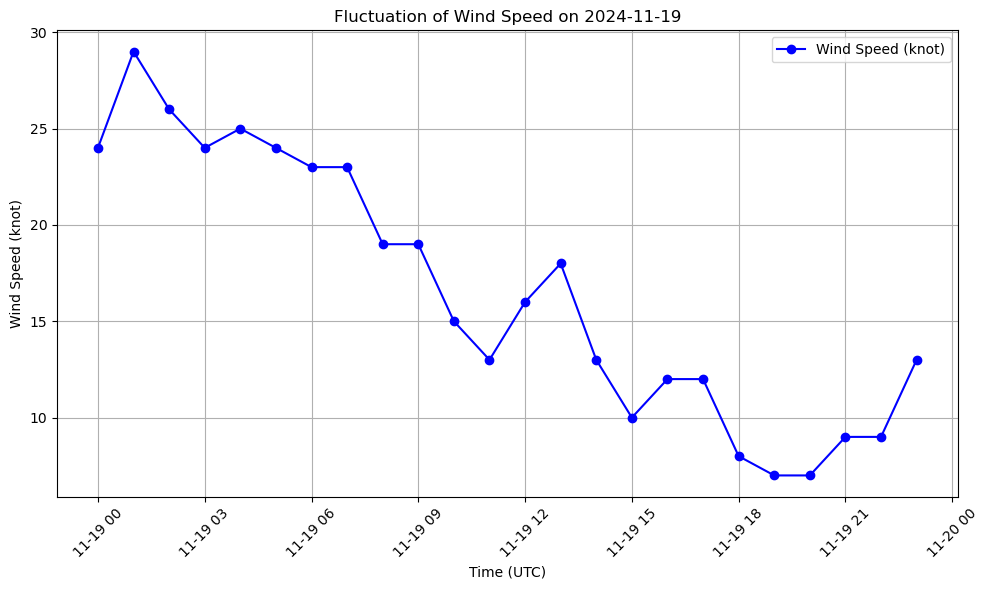

In [30]:
# Filter data for the specific date (19th November 2024)
specific_date = "2024-11-19"
filtered_data = df[df["Date and Time (UTC)"].dt.date == pd.to_datetime(specific_date).date()]

# Plot Wind Speed over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed on {specific_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

I then created a plot of the windspeed over a week, using the week with the most recent data.

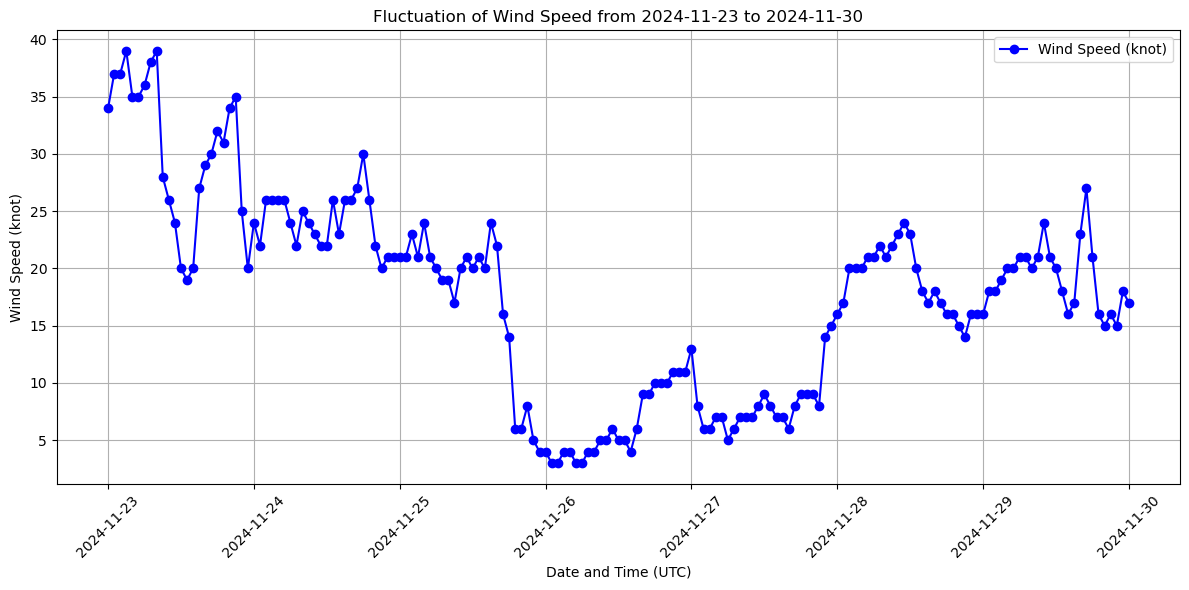

In [31]:
# date range
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Plot Wind Speed over week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Date and Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


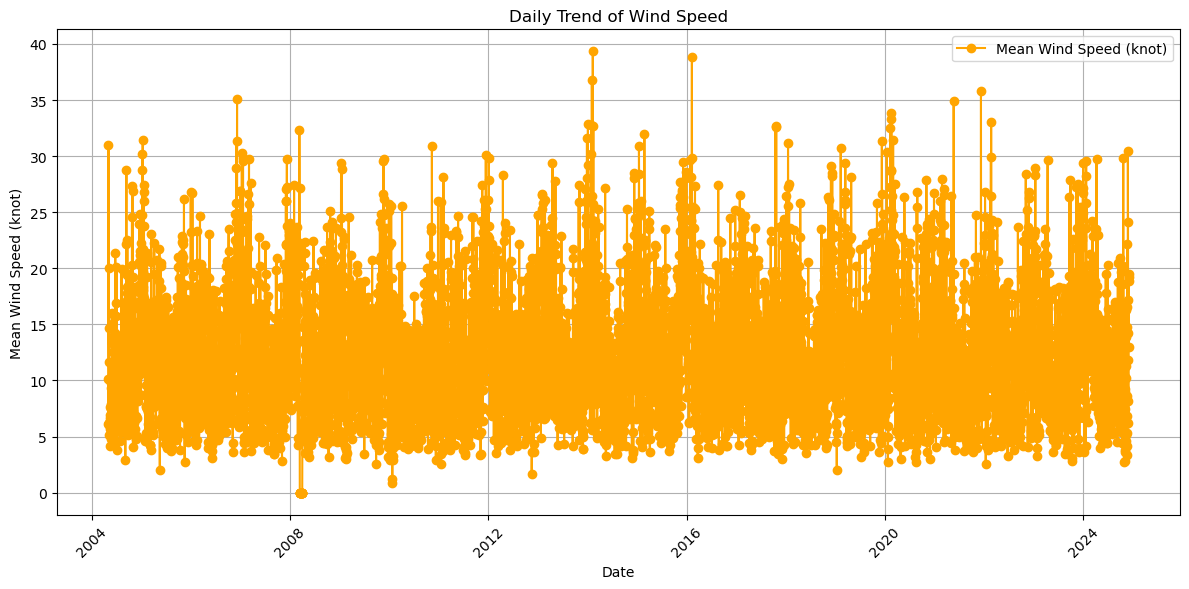

In [32]:
# date for grouping
df["Date"] = df["Date and Time (UTC)"].dt.date

#group by date and calculate daily mean
daily_data = df.groupby("Date").mean()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data["Mean Wind Speed (knot)"], marker='o', color='orange', label="Mean Wind Speed (knot)")
plt.xlabel("Date")
plt.ylabel("Mean Wind Speed (knot)")
plt.title("Daily Trend of Wind Speed")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [33]:
print(df["Mean Wind Speed (knot)"].unique()) 

[14. 12.  8. 10.  9. 11. 13.  7.  6.  4. 31. 20. 16. 15. 18. 17.  5.  2.
  3.  1. 19. 24. 26. 21. 25. 27. 22. 23. 28. 30. 29. 32. 33. 34. 37. 35.
 36. 40. 42. 38. 41.  0. 39. 44. 45. 48. 46. 43. 49. 47. 52. 54.]
